In [1]:
import pandas as pd

# Load the dataset (update the path if needed)
df = pd.read_csv('/content/MyProjects/predictive_maintenance.csv')

# Inspect the data
print("Shape of dataset:", df.shape)
print("Columns:", df.columns)
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())


Shape of dataset: (10000, 10)
Columns: Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3  

Data Cleaning & Preparation

In [2]:
# Drop duplicates
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)


After dropping duplicates: (10000, 10)


In [3]:
#handle missing values
print(df.isnull().sum())


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)


Index(['udi', 'product_id', 'type', 'air_temperature_[k]',
       'process_temperature_[k]', 'rotational_speed_[rpm]', 'torque_[nm]',
       'tool_wear_[min]', 'target', 'failure_type'],
      dtype='object')


In [5]:
#converted to numeric codes for analysis/visualization
df['product_id_code'] = df['product_id'].map({'L': 1, 'M': 2, 'H': 3})
df['failure_type_code'] = df['failure_type'].astype('category').cat.codes


Exploratory Data Analysis (EDA)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quick stats of numeric features
print(df.describe())

# Count of failures (target = 1 means failure)
print(df['target'].value_counts())


               udi  air_temperature_[k]  process_temperature_[k]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       rotational_speed_[rpm]   torque_[nm]  tool_wear_[min]        target  \
count            10000.000000  10000.000000     10000.000000  10000.000000   
mean              1538.776100     39.986910       107.951000      0.033900   
std                179.284096      9.968934        63.654147      0.180981   
min               1168.000000      3.800000         0.000000      0.000000 

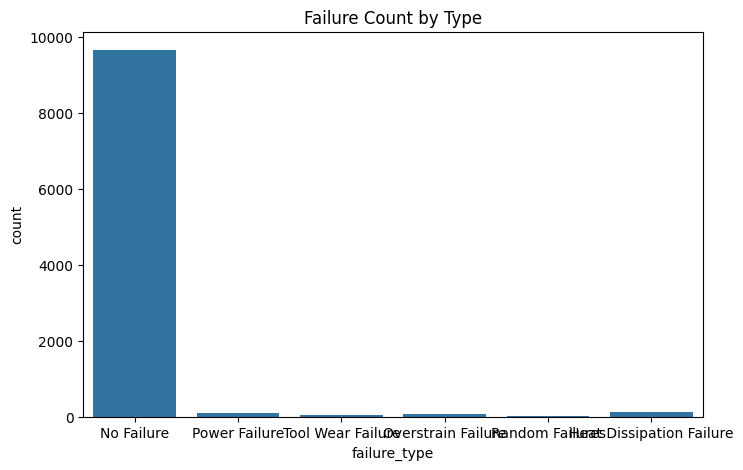

In [8]:
# Failure count by type
plt.figure(figsize=(8,5))
sns.countplot(x='failure_type', data=df)
plt.title('Failure Count by Type')
plt.show()

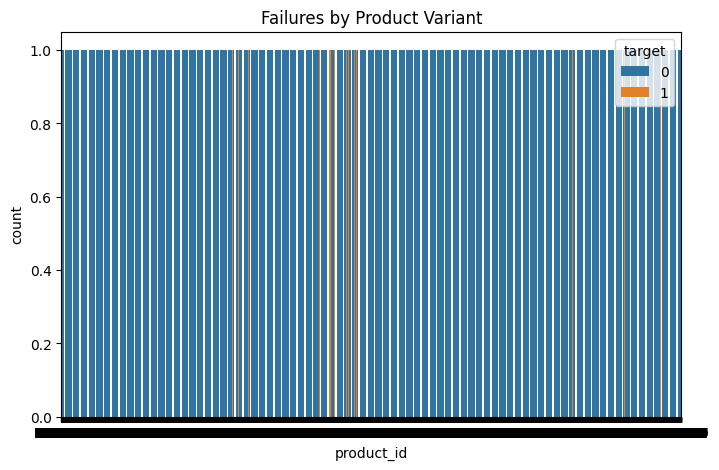

In [9]:
# Failures by Product Variant (product_id)
plt.figure(figsize=(8,5))
sns.countplot(x='product_id', hue='target', data=df)
plt.title('Failures by Product Variant')
plt.show()

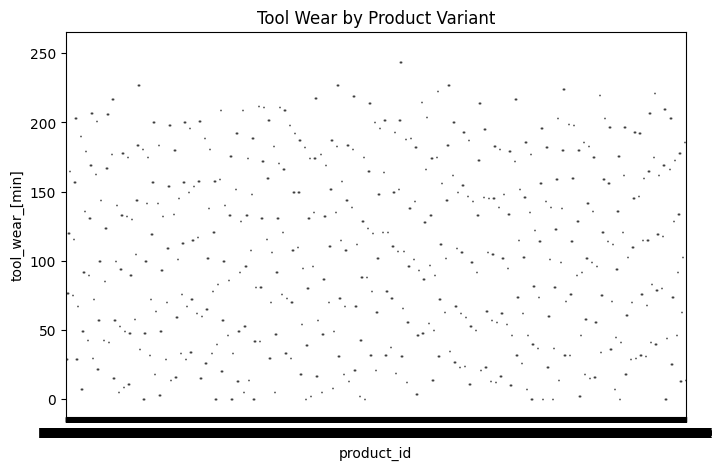

In [10]:
# Tool wear by Product Variant
plt.figure(figsize=(8,5))
sns.boxplot(x='product_id', y='tool_wear_[min]', data=df)
plt.title('Tool Wear by Product Variant')
plt.show()

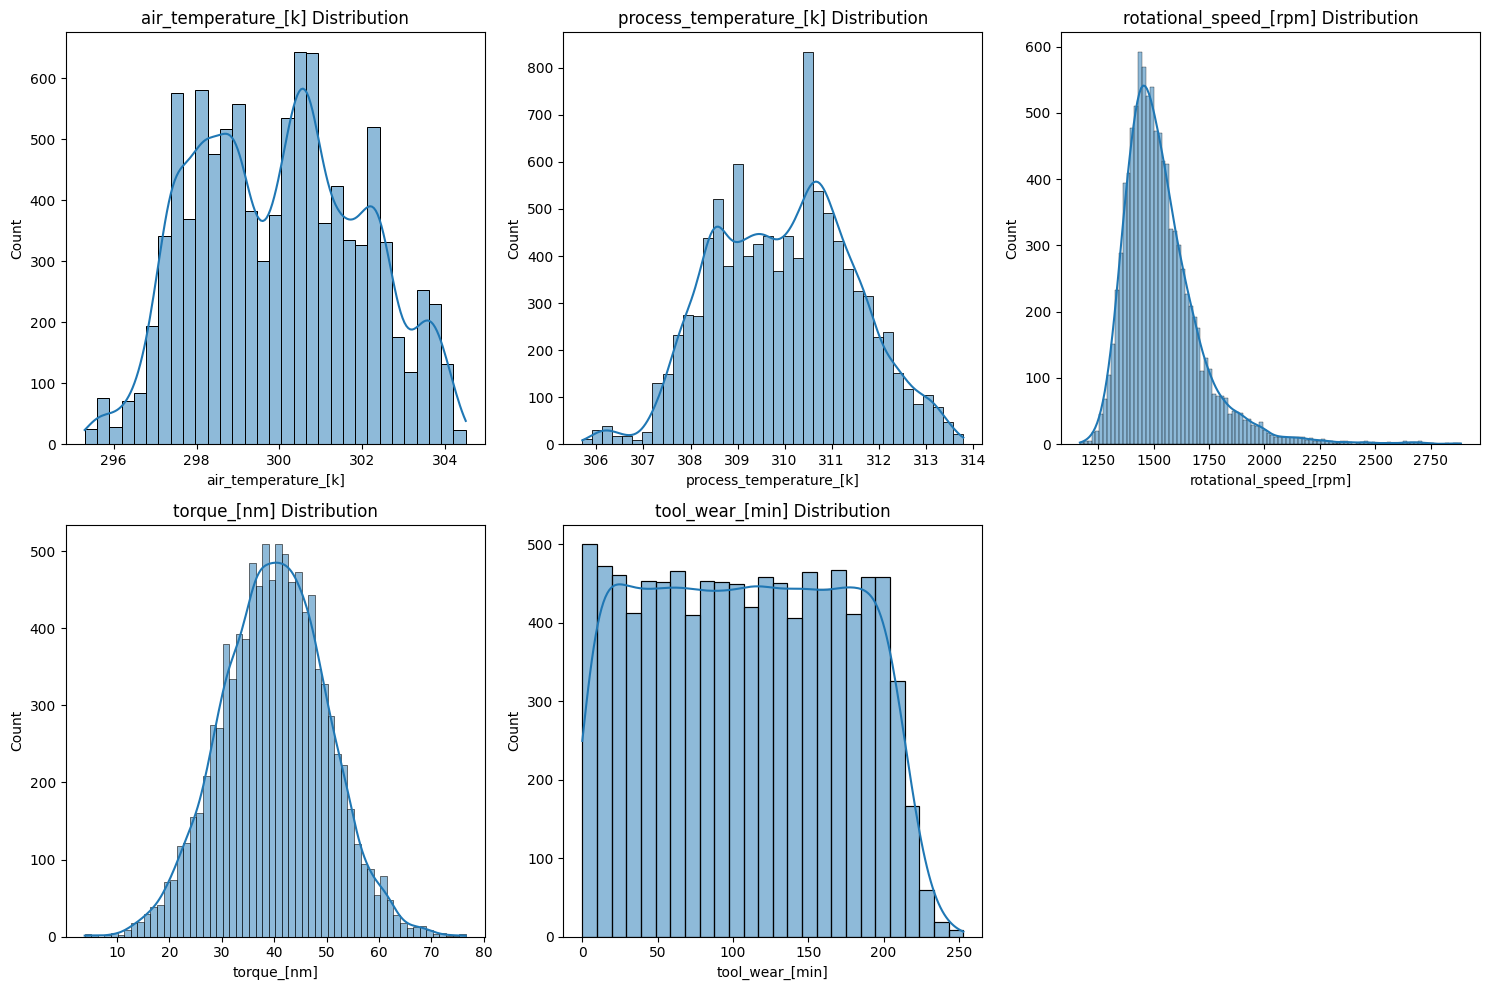

In [11]:
# Distribution of numeric features
numeric_features = ['air_temperature_[k]', 'process_temperature_[k]',
                    'rotational_speed_[rpm]', 'torque_[nm]', 'tool_wear_[min]']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_features):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

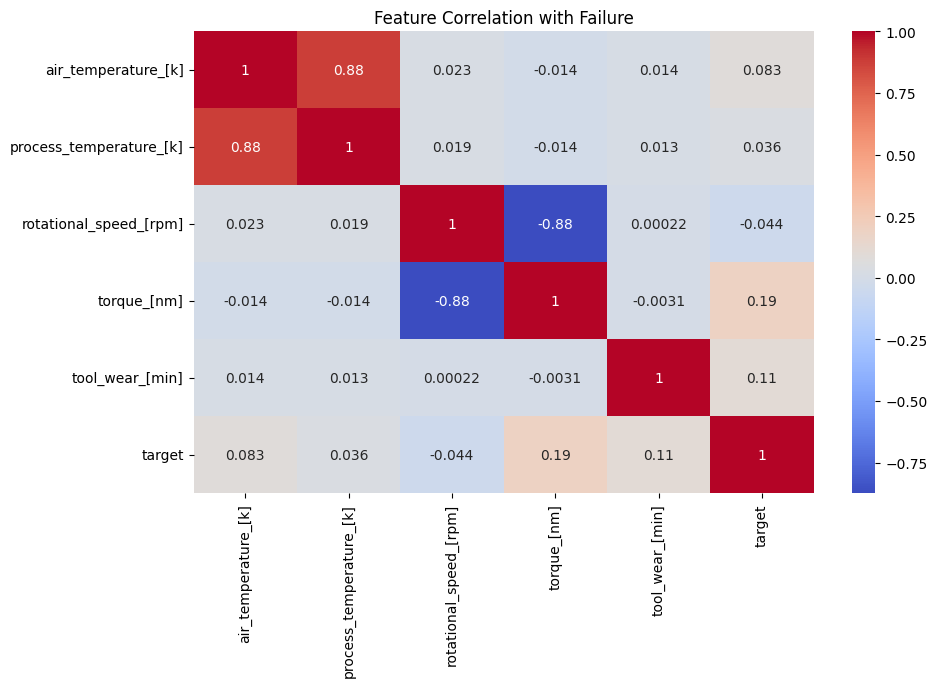

In [12]:
# Correlation heatmap with target
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_features + ['target']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Failure')
plt.show()

In [13]:
# MTBF per Product Variant
mtbf = df.groupby('product_id')['target'].apply(lambda x: 1/(x.mean() + 1e-5))
print("MTBF per Product Variant:\n", mtbf)

MTBF per Product Variant:
 product_id
H29424    100000.0
H29425    100000.0
H29432    100000.0
H29434    100000.0
H29441    100000.0
            ...   
M24849    100000.0
M24851    100000.0
M24855    100000.0
M24857    100000.0
M24859    100000.0
Name: target, Length: 10000, dtype: float64


In [14]:
# Average tool wear per Product Variant
avg_tool_wear = df.groupby('product_id')['tool_wear_[min]'].mean()
print("Average Tool Wear per Product Variant:\n", avg_tool_wear)

Average Tool Wear per Product Variant:
 product_id
H29424    24.0
H29425    29.0
H29432    50.0
H29434    58.0
H29441    77.0
          ... 
M24849     0.0
M24851     5.0
M24855    14.0
M24857    22.0
M24859    30.0
Name: tool_wear_[min], Length: 10000, dtype: float64


Key Metrics & Insights

In [16]:
#Encode Target
df['target_code'] = df['target']  # just to be explicit


In [17]:
#Mean Time Between Failures (MTBF)
mtbf = df.groupby('product_id')['target_code'].apply(lambda x: 1/(x.mean() + 1e-5))
print("MTBF per Product Variant:\n", mtbf)


MTBF per Product Variant:
 product_id
H29424    100000.0
H29425    100000.0
H29432    100000.0
H29434    100000.0
H29441    100000.0
            ...   
M24849    100000.0
M24851    100000.0
M24855    100000.0
M24857    100000.0
M24859    100000.0
Name: target_code, Length: 10000, dtype: float64


Interpretation: Higher MTBF → less frequent failures → more reliable machines/products.

In [18]:
avg_tool_wear = df.groupby('product_id')['tool_wear_[min]'].mean()
print("Average Tool Wear per Product Variant:\n", avg_tool_wear)


Average Tool Wear per Product Variant:
 product_id
H29424    24.0
H29425    29.0
H29432    50.0
H29434    58.0
H29441    77.0
          ... 
M24849     0.0
M24851     5.0
M24855    14.0
M24857    22.0
M24859    30.0
Name: tool_wear_[min], Length: 10000, dtype: float64


Insight: High tool wear variants may need more preventive maintenance.

Approximate Overall Equipment Effectiveness (OEE)

Simplified formula:
OEE=Availability×Performance×Quality

We can approximate:

Availability: Proportion of time the machine is running (1 – % downtime). Use tool wear as proxy for downtime.

Performance: Actual output / Ideal output (we can approximate rotational speed vs max).

Quality: 1 – Failure Rate

In [19]:
# Availability: 1 - normalized tool wear
availability = 1 - (df['tool_wear_[min]'] / df['tool_wear_[min]'].max())

# Performance: normalized rotational speed
performance = df['rotational_speed_[rpm]'] / df['rotational_speed_[rpm]'].max()

# Quality: 1 - failure rate
quality = 1 - df['target_code']

# Approximate OEE per row
df['OEE'] = availability * performance * quality

# Average OEE per product variant
oee_per_product = df.groupby('product_id')['OEE'].mean()
print("Average OEE per Product Variant:\n", oee_per_product)


Average OEE per Product Variant:
 product_id
H29424    0.558890
H29425    0.436552
H29432    0.363097
H29434    0.367215
H29441    0.436530
            ...   
M24849    0.546431
M24851    0.620545
M24855    0.525032
M24857    0.520428
M24859    0.458120
Name: OEE, Length: 10000, dtype: float64


Interpretation: Higher OEE → better overall machine effectiveness.

In [20]:
# Top 5 machines/products with highest failure rate
high_risk_products = df.groupby('product_id')['target_code'].mean().sort_values(ascending=False).head(5)
print("High-Risk Product Variants:\n", high_risk_products)


High-Risk Product Variants:
 product_id
L51335    1.0
M21538    1.0
L49255    1.0
L51337    1.0
M19416    1.0
Name: target_code, dtype: float64


Reporting

In [21]:
# MTBF per Product
mtbf_table = mtbf.reset_index().rename(columns={'target_code':'MTBF'})
print(mtbf_table)

# Average Tool Wear per Product
tool_wear_table = avg_tool_wear.reset_index().rename(columns={'tool_wear_[min]':'Avg_Tool_Wear'})
print(tool_wear_table)

# OEE per Product
oee_table = oee_per_product.reset_index().rename(columns={'OEE':'Avg_OEE'})
print(oee_table)

# High-risk Products
high_risk_table = high_risk_products.reset_index().rename(columns={'target_code':'Failure_Rate'})
print(high_risk_table)


     product_id      MTBF
0        H29424  100000.0
1        H29425  100000.0
2        H29432  100000.0
3        H29434  100000.0
4        H29441  100000.0
...         ...       ...
9995     M24849  100000.0
9996     M24851  100000.0
9997     M24855  100000.0
9998     M24857  100000.0
9999     M24859  100000.0

[10000 rows x 2 columns]
     product_id  Avg_Tool_Wear
0        H29424           24.0
1        H29425           29.0
2        H29432           50.0
3        H29434           58.0
4        H29441           77.0
...         ...            ...
9995     M24849            0.0
9996     M24851            5.0
9997     M24855           14.0
9998     M24857           22.0
9999     M24859           30.0

[10000 rows x 2 columns]
     product_id   Avg_OEE
0        H29424  0.558890
1        H29425  0.436552
2        H29432  0.363097
3        H29434  0.367215
4        H29441  0.436530
...         ...       ...
9995     M24849  0.546431
9996     M24851  0.620545
9997     M24855  0.525032
9998

In [22]:
mtbf_table.to_csv('MTBF_per_Product.csv', index=False)
tool_wear_table.to_csv('ToolWear_per_Product.csv', index=False)
oee_table.to_csv('OEE_per_Product.csv', index=False)
high_risk_table.to_csv('HighRisk_Products.csv', index=False)
